In [1]:
# need to import appropriate libraries for setting up fast.ai 
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from utils import *

In [7]:
# create an instance of Path objecting pointing to directory with cell images
path = Path('cell_images')
path.absolute()

Path('/notebooks/cell_images')

In [3]:
# make sure we have the right path 
# fns contains all of the file names that are images, get_image_files (thanks fast.ai) helps with this
fns = get_image_files(path)
fns

(#27558) [Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png'),Path('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png')...]

In [5]:
# some images may be corrupt, although this is unlikely (as the dataset is from kaggle), it doesn't hurt to check
failed = verify_images(fns)
failed

(#0) []

In [6]:
# get rid of the images that are corrupt
failed.map(Path.unlink);

In [8]:
# needs we convert our data into a dataloader object 
# the dataloader object is critical as it essentially provides data to our model 

cells = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

cells_dls = cells.dataloaders(path)

In [23]:
# do transfer learning using a resnet34 architecture
# this can probably be done with a bigger architecture, but not too sure if it will overfit or not
learn = cnn_learner(cells_dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.329400,0.156690,0.945019,02:03


epoch,train_loss,valid_loss,accuracy,time
0,0.211210,0.115436,0.958265,02:41
1,0.209136,0.108560,0.965705,02:40
2,0.176241,0.087887,0.971693,02:41
3,0.160728,0.079350,0.973689,02:41
4,0.141653,0.076359,0.974415,02:41


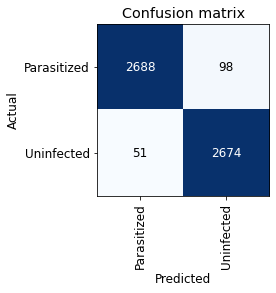

In [10]:
# confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

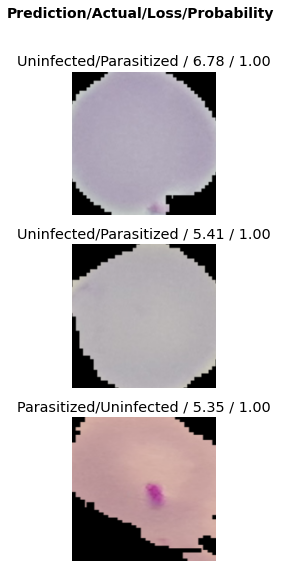

In [15]:
# look at our top losses, to see which pictures are giving us the most problems 
interp.plot_top_losses(3, nrows=3)